# Wrangling Train Accident Data

### Overview

We will clean and format train accident data for 
analysis. Our goal is to understand contributors 
to rail accidents in the U.S.

### Instructions

This notebook contains a small series of in-class 
exercises. Do these by yourself but you can consult
with others in the class, use the text, and search for
relevant materials on the web. 

At the end of class submit your completed notebook.
Use of a combination of mardown and code cells to 
present your answers the questions.

In [38]:
# Start here

# Data and analysis

import requests
import numpy as np
import pandas as pd
from collections import Counter


# Plotting
#import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline




# Exercise 1

Put the rail accident data reported by railroads for 
2015 in a pandas data frame. See the notes in 
the next cell. Then answer the following questions:
1. What are the rows?
2. What are the columns?
3. What are sizes of the dimensions?
4. What are the variables?
5. What variables predictors and what variables are responses?
6. What are interesting variables for the stated goal?
7. What are descriptive statistics on these interesting variables?
8. What are the important qualitative variables?


In [54]:
# Get rail accident data reported by railroads
# at the url http://safetydata.fra.dot.gov/
# Look under the drop-down: 
# Downloads -> Accident Data Reported by Railroads
# Get the data for 2015
import pandas as pd

url = 'http://safetydata.fra.dot.gov/Output/1546417.txt'
data_2015 = pd.read_csv(url)
Counter(data_2015['TYPEQ'])

Counter({nan: 146,
         '3': 19,
         'B': 16,
         'A': 73,
         'E': 5,
         '1': 970,
         '2': 70,
         '5': 117,
         '8': 164,
         '7': 731,
         'C': 11,
         '6': 163,
         'D': 37,
         '4': 18,
         '9': 19})

In [24]:
# 1. what are the rows?
print(data_2015[1:5])
# each row is an record describing one attributes of one specific accident
# look at column names to get a better idea:
print(data_2015.columns.values)
# read the reference file for colnames for this df, 
# each record describe attributes such as: month of incident, number of empty freight cars, etc.

# 2. what are the columns?
# columns are attributes that describe each incident

# 3. What are sizes of the dimensions?
print(data_2015.ndim) # ndim = 2

# 4. what are the variables
# columns are variables
# 5. What variables predictors and what variables are responses?
# responses: variables like: accdmg(total damage in $), casualties(total # of ppl killed + total # of ppl injured)
# predictors: predictors like: weather, turnspeed, weight of train, etc.
# 6. What are interesting variables for the stated goal?
# if the goal is to investigate what factors are significant in train accidents,
# then speed of train when the accident happened, or weather of the time when that accident happened, 
# could be interesting.

# hypothese: speed has no association with casulties. <- because you want to be able to reject the hypotheses.

# 7. What are descriptive statistics on these interesting variables?

# 8. What are the important qualitative variables?

data_2015[['ACCDMG','TOTKLD','TOTINJ','TRNSPD','TONS','TIMEHR']].describe()
# total reports: 2559

# check for missing data:
pd.isnull(data_2015).any() # indicate lots of missing data.

  AMTRAK  IYR  IMO RAILROAD    INCDTNO  IYR2  IMO2   RR2  INCDTNO2  IYR3  \
1    NaN   15    4      CSX  000144316   NaN   NaN   NaN       NaN    15   
2    NaN   15    3      CSX  000142845   NaN   NaN   NaN       NaN    15   
3      K   15   12      ATK     140597   NaN   NaN   NaN       NaN    15   
4    NaN   15   12       NS     118543  15.0  12.0  FGLK  12112015    15   

      ...      NARR15  RCL Latitude  Longitud SIGNAL  MOPERA  ADJUNCT1  \
1     ...         NaN  0.0    42.56    -73.85      2     5.0       NaN   
2     ...         NaN  0.0    42.56    -73.85      2     5.0       NaN   
3     ...         NaN  0.0    42.63    -73.74      2     5.0       NaN   
4     ...         NaN  NaN    42.87    -76.96      2     5.0         K   

   ADJUNCT2  ADJUNCT3      SUBDIV  
1       NaN       NaN     SELKIRK  
2       NaN       NaN     SELKIRK  
3       NaN       NaN         NaN  
4       NaN       NaN  HARRISBURG  

[4 rows x 146 columns]
['AMTRAK' 'IYR' 'IMO' 'RAILROAD' 'INCDTNO' '

AMTRAK       True
IYR         False
IMO         False
RAILROAD    False
INCDTNO     False
IYR2         True
IMO2         True
RR2          True
INCDTNO2     True
IYR3        False
IMO3        False
RR3         False
INCDTNO3    False
DUMMY1       True
GXID         True
YEAR        False
MONTH       False
DAY         False
TIMEHR      False
TIMEMIN     False
AMPM        False
TYPE        False
CARS        False
CARSDMG     False
CARSHZD     False
EVACUATE    False
DIVISION     True
STATION      True
MILEPOST     True
STATE       False
            ...  
ALCOHOL      True
DRUG         True
DUMMY7       True
PASSTRN      True
SSB1        False
SSB2         True
NARR1       False
NARR2        True
NARR3        True
NARR4        True
NARR5        True
NARR6        True
NARR7        True
NARR8        True
NARR9        True
NARR10       True
NARR11       True
NARR12       True
NARR13       True
NARR14       True
NARR15       True
RCL          True
Latitude    False
Longitud    False
SIGNAL    

# Exercise 2

For at least two qualitative variables other than CAUSE, look at the levels and frequency of levels. For at least two qualitative variables that are coded as integers, recode them as categorical variables and define the levels using strings.  What type of variable is CAUSE? How is it coded?

In [42]:
# Identify two cat variables other than Cause
# pick: weather, method

data_2015[['CAUSE','TYPEQ','EQATT']].describe()
# look at their levels and frequency of levels
# to check frequency of levels
Counter(data_2015.TYPEQ)

,CAUSE,TYPEQ,EQATT
count,2559,2413,2411
unique,246,14,2
top,H702,1,Y
freq,112,970,2105


In [44]:
# looking at CAUSE, think about dummy encoding.
# playing around with CAUSE to illustrate how to manipulate categorical variables:
data_2015.CAUSE = data_2015.CAUSE.apply(lambda x: x[0])
Counter(data_2015.CAUSE)

Counter({'E': 291, 'H': 1007, 'M': 597, 'S': 73, 'T': 591})

In [56]:
map_typeq = {'1':'Freight', '2':'Passenger', '3':'Commuter', '4':'Work', '5':'Single',
             '6':'CutofCars', '7':'Yard', '8':'Light', '9':'Maint', 'A':'Maint of Way',
             'B':'B','C':'C','D':'D','E':'E',
}
# to map a dictionary to a series object.
# look for keys in series, then map values in the dict to corresponding keys.
data_2015['TYPEQ'] = data_2015['TYPEQ'].map(map_typeq)
Counter(data_2015['TYPEQ'])

pandas.core.series.Series

# Exercise 3

What are the narratives? How are they organized? 
Write python to join narratives for each accident
into one document. Then put all the documents
into a list. Read some of these documents and comment
on their content.

In [85]:
# use a for loop to concatenate all strings together for a column.
result = []
for i in range(len(data_2015['NARR1'])):
    result.append(data_2015.ix[i,'NARR1'] + ' ')
# () FOR TUPLE,
# [] FOR LIST,
# {} FOR DISCTIONARY!!!!!!!!!!!!!!!!!!!!!!!

'DURING NORMAL HUMPING OPERATIONS GATX 26959 DERAILED IN THE GROUP RETARDERS . '

# Exercise 4

For at least 2 of the quantitative response and at least two of the quantitative predictor variables produce histograms and box plots. Comment on what you observe.

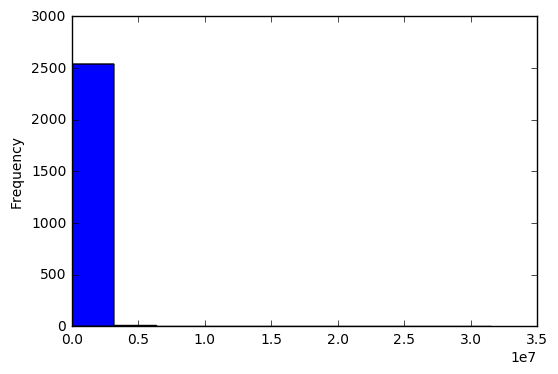

In [89]:
# stergios 

data_2015.ACCDMG.plot(kind = 'hist')

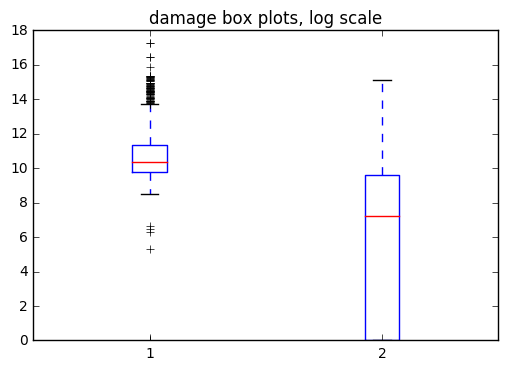

In [94]:
plt.boxplot([np.log(data_2015.ACCDMG + 1),np.log(data_2015.TRKDMG+1)])
plt.title("damage box plots, log scale")

# Exercise 5

Get rail accident data reported by railroads
for the years 2001 and 2008. Merge the data from these two years with the accident data for 2015.

1. What are sizes of the dimensions?
2. What are descriptive statistics on the important predictive and response variables?
3. What are the level frequency counts on the important qualitative variables?


In [95]:
# get data
url = 'http://safetydata.fra.dot.gov/Output/1657576.txt'
data_2001 = pd.read_csv(url)

url = 'http://safetydata.fra.dot.gov/Output/1658207.txt'
data_2008 = pd.read_csv(url)

In [109]:
# merge together.
frames = [data_2015, data_2001, data_2008]
result = pd.concat(frames)
a  = data_2015[['ACCDMG','TOTKLD','TOTINJ','TRNSPD','TONS','TIMEHR']].describe().iloc[0][0]
b = data_2001[['ACCDMG','TOTKLD','TOTINJ','TRNSPD','TONS','TIMEHR']].describe().iloc[0][0]
c = data_2008[['ACCDMG','TOTKLD','TOTINJ','TRNSPD','TONS','TIMEHR']].describe().iloc[0][0]
d= result[['ACCDMG','TOTKLD','TOTINJ','TRNSPD','TONS','TIMEHR']].describe().iloc[0][0]
# prove result being correct.
a+b+c == d


True